In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [51]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """

    return np.exp((-1/(2 * np.power(sigma, 2))) * scipy.spatial.distance.cdist(X1, X2, 'sqeuclidean'))


def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors
         x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO

    return np.power((offset + np.dot(X1, X2.T)), degree)

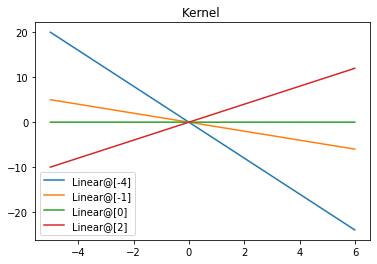

In [52]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts)
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('Kernel ')
plt.savefig('figures/Q21.png')
plt.show() 
 
 

In [4]:
# Q21

prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
# Linear kernel
y = linear_kernel(prototypes, prototypes)

print(y)

y = polynomial_kernel(prototypes, prototypes, offset=1, degree=3)

print(y)


[[16  4  0 -8]
 [ 4  1  0 -2]
 [ 0  0  0  0]
 [-8 -2  0  4]]
[[4913  125    1 -343]
 [ 125    8    1   -1]
 [   1    1    1    1]
 [-343   -1    1  125]]


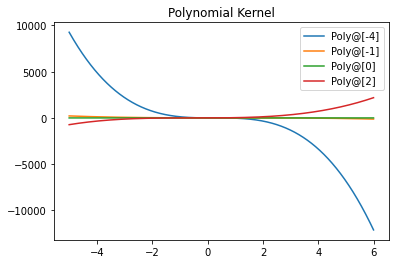

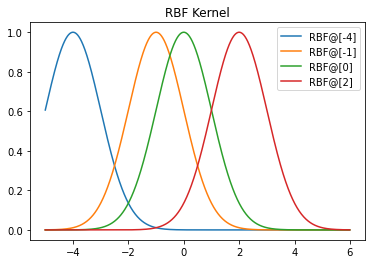

In [53]:
# Q22

plot_step = .01
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Poly kernel
y = polynomial_kernel(prototypes, xpts, 1, 3)
for i in range(len(prototypes)):
    label = "Poly@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('Polynomial Kernel')
plt.savefig('figures/Q22_poly.png')
plt.show()


# RBF kernel
y = RBF_kernel(prototypes, xpts, 1)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('RBF Kernel')
plt.savefig('figures/Q22_rbf.png')
plt.show()

In [54]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        Ker = self.kernel(self.training_points, X)
        
        return np.matmul(Ker.T, self.weights)

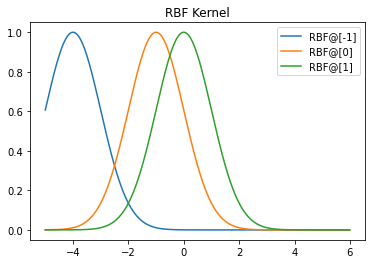

In [55]:
# Q23

km = Kernel_Machine(kernel=functools.partial(RBF_kernel, sigma=1),
                   training_points=np.array([-1, 0, 1]).reshape(-1,1),
                   weights=np.array([1, -1, 1]).reshape(-1,1)
                   )

Q23_res = km.predict(X=np.arange(-5.0, 6, .01).reshape(-1,1))

for i in range(len(np.array([-1, 0, 1]).reshape(-1,1))):
    label = "RBF@"+str(np.array([-1, 0, 1]).reshape(-1,1)[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.title('RBF Kernel')
plt.savefig('figures/Q23.png')
plt.show()

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [56]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

In [57]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    alpha = np.linalg.inv(l2reg * np.identity(y.shape[0]) + kernel(X, X)) @ y
    
    return Kernel_Machine(kernel, X, alpha)

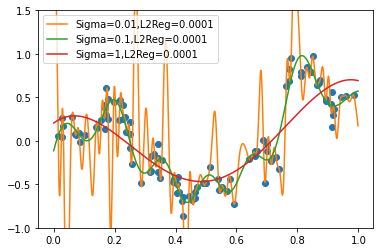

In [58]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

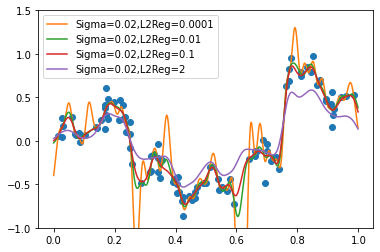

In [60]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [61]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [62]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [64]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [73]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.021270,0.023245
24,-,RBF,0.1250,-,0.1,0.022885,0.024608
21,-,RBF,0.2500,-,0.1,0.024845,0.026226
18,-,RBF,0.5000,-,0.1,0.026609,0.028110
15,-,RBF,1.0000,-,0.1,0.027562,0.030319
12,-,RBF,2.0000,-,0.1,0.028041,0.033539
9,-,RBF,4.0000,-,0.1,0.030082,0.039685
6,-,RBF,8.0000,-,0.1,0.037650,0.052373
54,4,polynomial,0.0100,-1,-,0.043454,0.060135
3,-,RBF,16.0000,-,0.1,0.055006,0.075591


In [81]:
df_poly = df_toshow[df_toshow['param_kernel'] == 'polynomial']
df_rbf = df_toshow[df_toshow['param_kernel'] == 'RBF']
df_linear = df_toshow[df_toshow['param_kernel'] == 'linear']

In [87]:
df_linear.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
58,-,linear,1.00,-,-,0.164540,0.206506
59,-,linear,0.01,-,-,0.164569,0.206501
57,-,linear,10.00,-,-,0.164591,0.206780


In [74]:
# Can be a more convenient way to look at the table
import qgrid 
# qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

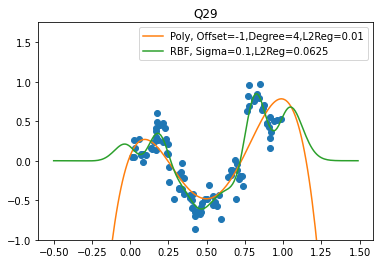

In [92]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -1
degree = 4
l2reg = 0.01
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Poly, Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = .1
l2reg= .0625
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "RBF, Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.title('Q29')
plt.savefig('figures/Q29.png')
plt.show()

# Kernel SVM optional problem

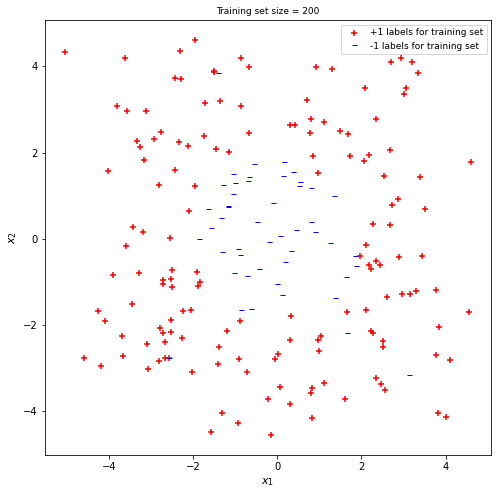

In [100]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=(8, 8)) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.savefig('figures/Q31_original.png')
plt.show()

In [ ]:
# Polynominal kernel
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=(8, 8)) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.savefig('figures/Q31_original.png')
plt.show()

[-5.58714156e+01  4.72954592e+01  6.19080187e+01  4.44500000e+01
  5.39784440e+01  5.31304347e+01  3.96234242e+01 -9.91581860e+00
  2.77279068e+01  3.12831166e+01  2.74895555e+01  7.67738446e+01
 -1.26552615e+01 -3.59472044e+01 -8.49470187e+00  6.10614683e+01
  2.43211010e+01  5.56949398e+01  6.20465679e+00 -3.29782501e+01
  1.19585284e+02  4.74689618e+01  9.68306432e+01  8.25485264e+01
  8.85877519e+01 -3.19157551e+01 -3.28566671e+01  6.92870476e+01
  1.04334412e+01 -3.06271838e+00 -7.56503244e-01 -4.58167585e+01
  6.44770305e+01  3.14181323e+00  5.12996848e+01  1.15465790e+02
  6.37334044e+01  5.39950797e+01  4.48268179e+00 -7.58310007e+01
 -4.20141282e+01 -2.51253128e+00  9.03883256e+01  1.60431701e+01
 -3.49431628e+01  7.53377324e-01 -2.05965800e+01 -8.87546479e+01
  6.97050963e+00 -1.24482733e+02  2.59661456e+01  2.85339043e+01
 -1.11536140e+01  5.92775400e+01 -2.06066897e+01 -1.17150566e+01
  3.31355886e+01 -2.04366672e+01  4.26669632e+01  8.97834250e+00
  3.40053832e+01  5.24513

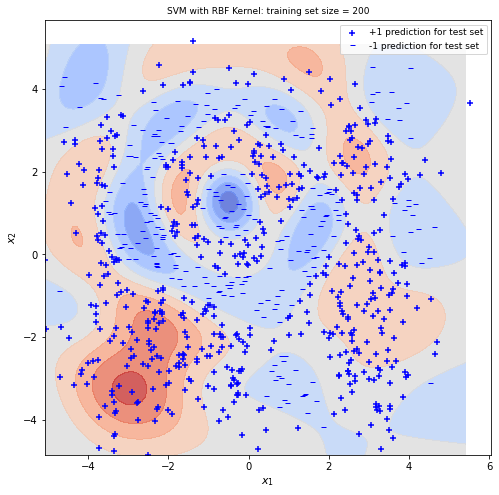

In [125]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, 1e-5)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test)
print(y_bar)
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=(8, 8)) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [123]:
def train_soft_svm(X_train,
                   y_train,
                   kernel,
                   lamb,
                   epoch=20):
    assert lamb > 0
    
    X, Y = X_train, y_train
    K = kernel(X, X)
    t, dim = 0, K.shape[0]
    alpha = np.zeros(dim)

    for i in range(epoch):
        for j in range(dim):
            t += 1
            eta = 1 / (t * lamb)
            y_pred = np.matmul(K[i], alpha)
            
            alpha -= lamb * eta * np.matmul(K , alpha)

            if Y[i][0] * y_pred < 1:
                alpha += Y[i][0] * eta * K[i]
    
    return Kernel_Machine(kernel, X, alpha)

In [ ]:
# Q33

def classification_error(y, y_pred):
    res = 0
    for i in range(len(y)):
        if y[i] * y_pred[i] > 0:
            res += 1
    return 1 - res / len(y)

param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
# RBF
rbf_res = []
params = param_grid[0]
for sigma in params['sigma']:
    for reg in params['l2reg']:
        print(offset, deg, reg)
        k = functools.partial(RBF_kernel, sigma=sigma)
        f = train_soft_svm(x_train, y_train, k, reg)
        y_pred = f.predict(x_test)
        print(y_pred)
        rbf_res.append((sigma, reg, classification_error(y_test, y_pred)))

print('*' * 50)
# Linear
linear_res = []
params = param_grid[2]
for reg in params['l2reg']:
    print(offset, deg, reg)
    k = functools.partial(linear_kernel)
    f = train_soft_svm(x_train, y_train, k, reg)
    y_pred = f.predict(x_test)
    linear_res.append((reg, classification_error(y_test, y_pred)))
    
print('*' * 50)     
# Poly
poly_res = []
params = param_grid[1]
for offset in params['offset']:
    for deg in params['degree']:
        for reg in params['l2reg']:
            print(offset, deg, reg)
            k = functools.partial(polynomial_kernel, offset=offset, degree=deg)
            f = train_soft_svm(x_train, y_train, k, reg)
            y_pred = f.predict(x_test)
            poly_res.append((offset, deg, reg, classification_error(y_test, y_pred)))

1 4 32.0
[-3.54779616e-16  8.72430533e-06  3.80469855e-06 -2.09118535e-16
 -1.10184026e-26  4.51861697e-19  4.54531900e-42 -3.39395751e-17
  1.61583342e-18 -1.02875884e-15 -1.02357164e-17  1.68051824e-10
 -1.09744337e-06  2.73699333e-08 -1.64580553e-22  4.50003252e-18
  1.30997178e-13  2.87762948e-15  1.36761140e-12 -1.21697335e-06
 -1.52082663e-08 -2.57117179e-15 -1.71463220e-17  1.32988199e-15
 -3.71092689e-20 -4.18324891e-10 -5.72597406e-13  6.49496313e-17
  1.38246943e-03  1.52593752e-14  1.10005501e-25 -7.22798083e-23
  1.17141194e-12  5.18632127e-42  7.30864577e-08  6.19354359e-11
 -1.37292270e-10 -4.70046201e-14  3.13087719e-04 -2.50313085e-21
  3.31038174e-09  2.60346016e-16  7.40407473e-25  7.65484131e-19
  8.85218789e-17 -3.52841161e-12 -1.03085951e-16  9.17357079e-28
  1.58700365e-52 -2.41149952e-06  5.04220679e-37  7.92962109e-08
 -1.19802103e-10 -2.34946923e-14  6.30501779e-09 -1.78413116e-12
  3.26521825e-20  9.54992702e-25 -4.41597586e-28  3.42363033e-14
  1.22898757e-10

In [121]:
poly_res

[(-1, 2, 10, 1.0),
 (-1, 2, 0.1, 1.0),
 (-1, 2, 0.01, 1.0),
 (-1, 3, 10, 1.0),
 (-1, 3, 0.1, 1.0),
 (-1, 3, 0.01, 1.0),
 (-1, 4, 10, 1.0),
 (-1, 4, 0.1, 1.0),
 (-1, 4, 0.01, 1.0),
 (0, 2, 10, 1.0),
 (0, 2, 0.1, 1.0),
 (0, 2, 0.01, 1.0),
 (0, 3, 10, 1.0),
 (0, 3, 0.1, 1.0),
 (0, 3, 0.01, 1.0),
 (0, 4, 10, 1.0),
 (0, 4, 0.1, 1.0),
 (0, 4, 0.01, 1.0),
 (1, 2, 10, 1.0),
 (1, 2, 0.1, 1.0),
 (1, 2, 0.01, 1.0),
 (1, 3, 10, 1.0),
 (1, 3, 0.1, 1.0),
 (1, 3, 0.01, 1.0),
 (1, 4, 10, 1.0),
 (1, 4, 0.1, 1.0),
 (1, 4, 0.01, 1.0)]